In [23]:
# Import libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\moses\Downloads\jamb_exam_results.csv.csv")

# Preview dataset
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())


Shape: (5000, 17)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 no

In [25]:
print("Shape:", df.shape)


Shape: (5000, 17)


In [27]:
print("\nInfo:")
print(df.info())



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 

In [29]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0         192                    22               78                4   
1         207                    14               88                4   
2         182                    29               87                2   
3         210                    29               99                2   
4         199                    12               98                3   

   Distance_To_School School_Type School_Location Extra_Tutorials  \
0                12.4      Public           Urban             Yes   
1                 2.7      Public           Rural              No   
2                 9.6      Public           Rural             Yes   
3                 2.6      Public           Urban              No   
4                 8.8      Public           Urban              No   

  Access_To_Learning_Materials Parent_Involvement IT_Knowledge  Student_ID  \
0                          Yes               High    

In [33]:
# Fill missing Parent_Education_Level
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Unknown')


In [35]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if found
df = df.drop_duplicates()


Duplicate rows: 0


In [37]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['School_Type', 'School_Location', 'Extra_Tutorials', 
                    'Access_To_Learning_Materials', 'Parent_Involvement', 
                    'IT_Knowledge', 'Gender', 'Socioeconomic_Status', 'Parent_Education_Level']

# Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [41]:
from sklearn.preprocessing import StandardScaler

# List of numerical features (excluding the target 'JAMB_Score')
numerical_cols = ['Study_Hours_Per_Week', 'Attendance_Rate', 'Teacher_Quality', 
                  'Distance_To_School', 'Age', 'Assignments_Completed']

# Initialize scaler
scaler = StandardScaler()

# Apply scaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [43]:
# Average JAMB score by School Type
school_type_group = df.groupby('School_Type')['JAMB_Score'].mean()
print("Average JAMB Score by School Type:\n", school_type_group)


Average JAMB Score by School Type:
 School_Type
0    181.216601
1    171.655689
Name: JAMB_Score, dtype: float64


In [45]:
# Average JAMB score by Socioeconomic Status
socio_group = df.groupby('Socioeconomic_Status')['JAMB_Score'].mean()
print("\nAverage JAMB Score by Socioeconomic Status:\n", socio_group)



Average JAMB Score by Socioeconomic Status:
 Socioeconomic_Status
0    190.744917
1    164.772424
2    174.131164
Name: JAMB_Score, dtype: float64


In [47]:
# Average JAMB score by Gender
gender_group = df.groupby('Gender')['JAMB_Score'].mean()
print("\nAverage JAMB Score by Gender:\n", gender_group)



Average JAMB Score by Gender:
 Gender
0    174.763241
1    173.369231
Name: JAMB_Score, dtype: float64


In [49]:
# Basic JAMB_Score statistics
print(df['JAMB_Score'].describe())

# Value counts of rounded JAMB scores
print("\nRounded JAMB Scores Distribution:")
print(df['JAMB_Score'].round(-1).value_counts().sort_index())


count    5000.000000
mean      174.074600
std        47.616477
min       100.000000
25%       135.000000
50%       170.000000
75%       209.000000
max       367.000000
Name: JAMB_Score, dtype: float64

Rounded JAMB Scores Distribution:
JAMB_Score
100    222
110    304
120    413
130    289
140    376
150    348
160    399
170    295
180    400
190    334
200    293
210    223
220    289
230    214
240    261
250    118
260     43
270     53
280     49
290     34
300     19
310      2
320      6
330      3
340      4
350      1
360      4
370      4
Name: count, dtype: int64


In [51]:
# Correlation matrix
correlation = df.corr()

# Print correlations with JAMB_Score
print("\nCorrelation with JAMB_Score:")
print(correlation['JAMB_Score'].sort_values(ascending=False))



Correlation with JAMB_Score:
JAMB_Score                      1.000000
Study_Hours_Per_Week            0.420061
Teacher_Quality                 0.299505
Attendance_Rate                 0.280953
Assignments_Completed           0.278079
Extra_Tutorials                 0.067432
Access_To_Learning_Materials    0.047242
School_Location                 0.027997
Student_ID                      0.014646
Parent_Education_Level         -0.003545
Gender                         -0.014638
Age                            -0.028432
School_Type                    -0.087298
Distance_To_School             -0.094142
IT_Knowledge                   -0.097563
Socioeconomic_Status           -0.099005
Parent_Involvement             -0.109038
Name: JAMB_Score, dtype: float64


Matplotlib is building the font cache; this may take a moment.


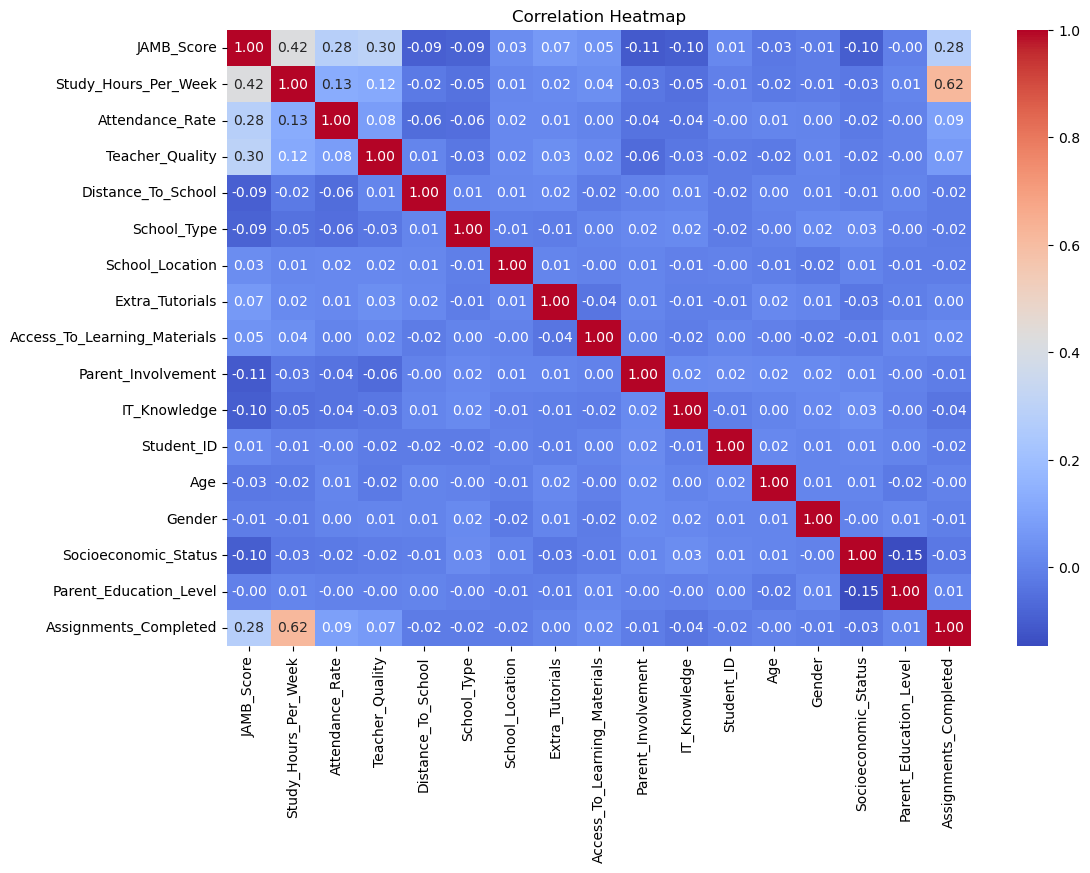

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


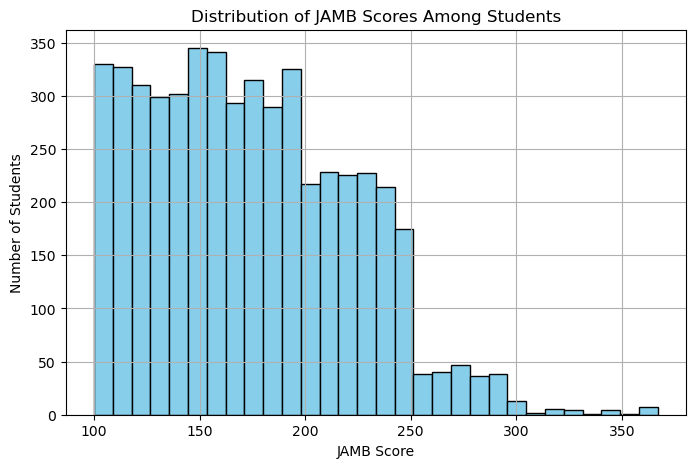

In [55]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8,5))
plt.hist(df['JAMB_Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of JAMB Scores Among Students')
plt.xlabel('JAMB Score')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


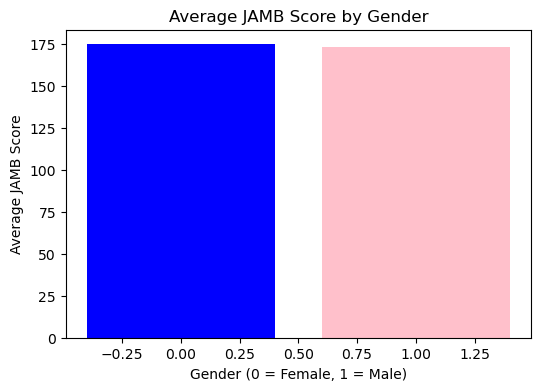

In [57]:
# Group by Gender
gender_avg = df.groupby('Gender')['JAMB_Score'].mean()

# Plot
plt.figure(figsize=(6,4))
plt.bar(gender_avg.index, gender_avg.values, color=['blue', 'pink'])
plt.title('Average JAMB Score by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Average JAMB Score')
plt.show()


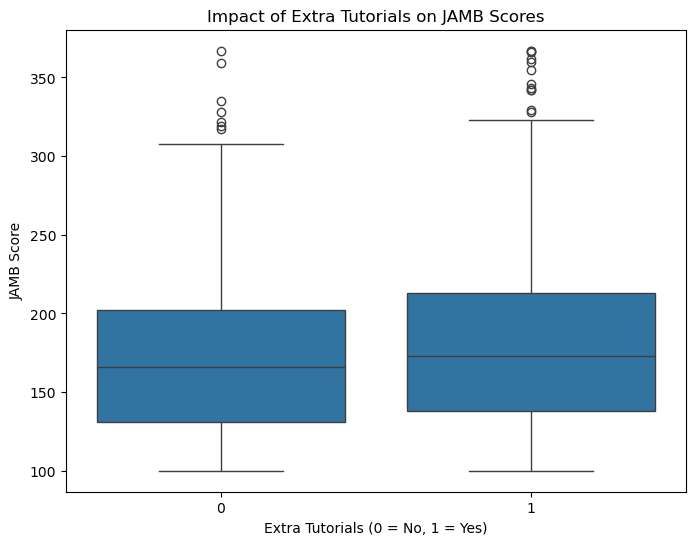

In [59]:
import seaborn as sns

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Extra_Tutorials', y='JAMB_Score', data=df)
plt.title('Impact of Extra Tutorials on JAMB Scores')
plt.xlabel('Extra Tutorials (0 = No, 1 = Yes)')
plt.ylabel('JAMB Score')
plt.show()


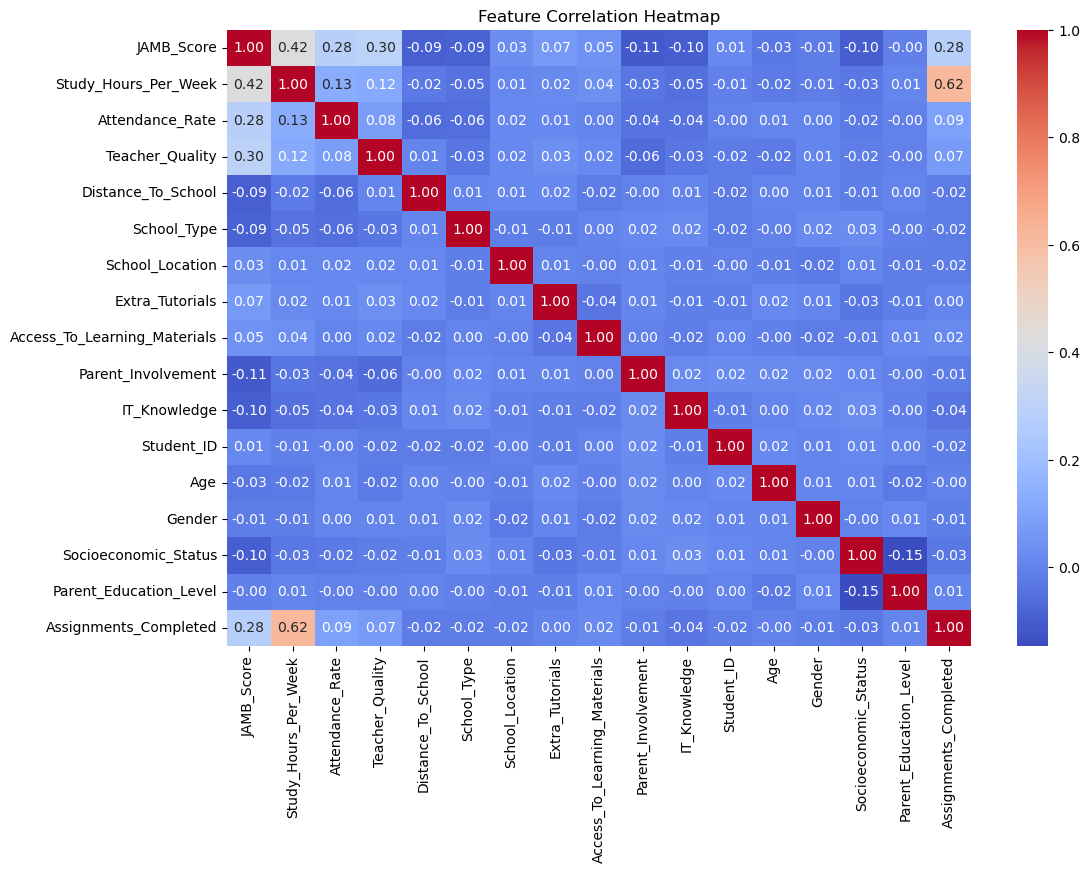

In [61]:
# Plot
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


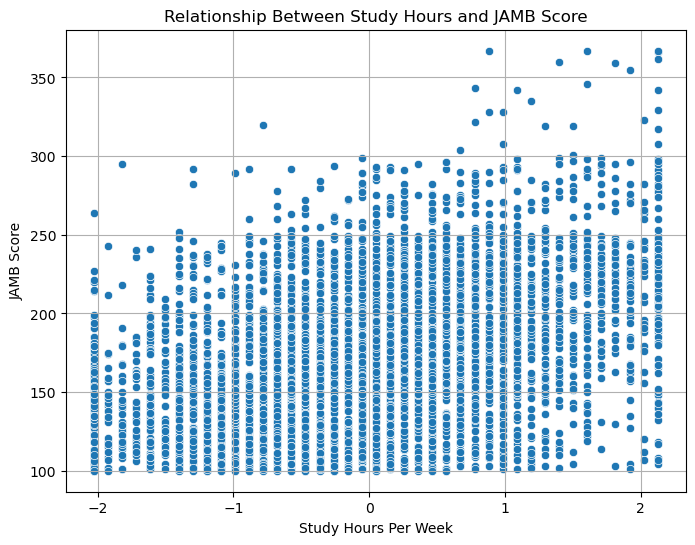

In [63]:
# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Study_Hours_Per_Week', y='JAMB_Score', data=df)
plt.title('Relationship Between Study Hours and JAMB Score')
plt.xlabel('Study Hours Per Week')
plt.ylabel('JAMB Score')
plt.grid(True)
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [67]:
# Features (all columns except target)
X = df.drop(columns=['JAMB_Score'])

# Target (what we are predicting)
y = df['JAMB_Score']


In [69]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (3500, 16)
Testing data size: (1500, 16)


In [71]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [73]:
# Predict on test data
y_pred = model.predict(X_test)


In [75]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")


Mean Absolute Error (MAE): 32.54
Mean Squared Error (MSE): 1602.23
Root Mean Squared Error (RMSE): 40.03
R-squared (R² Score): 0.32


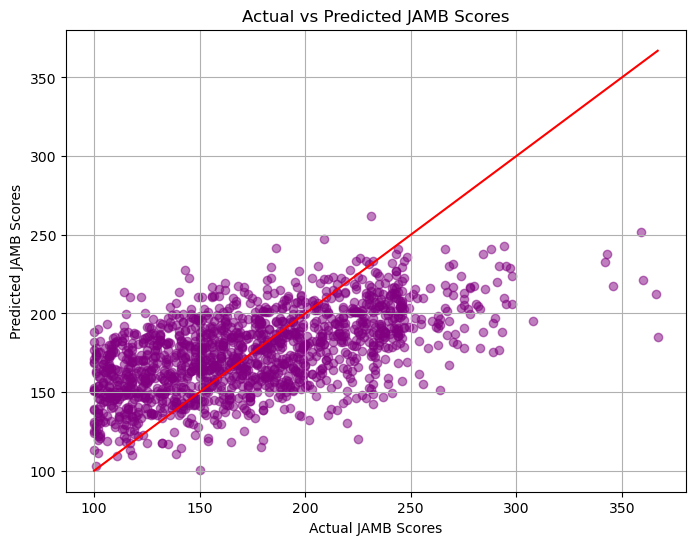

In [77]:
# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Perfect prediction line
plt.xlabel('Actual JAMB Scores')
plt.ylabel('Predicted JAMB Scores')
plt.title('Actual vs Predicted JAMB Scores')
plt.grid(True)
plt.show()
